<a href="https://colab.research.google.com/github/MilerDiazZevallos/Arequipa-Covid-19/blob/master/Sala_Situacional_Arequipa_MINSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize Environment


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.optimize import curve_fit
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load Data from MINSA

In [ ]:
import requests 

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

In [ ]:
url_minsa = 'positivos_covid.csv'
download_url("https://www.datosabiertos.gob.pe/node/6447/download/"+url_minsa, url_minsa)

In [ ]:
datos_minsa = pd.read_csv(url_minsa, encoding = "ISO-8859-1", sep=";")

# Análisis por días de contagio

In [ ]:
datos_minsa

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210322,7320cabdc1aaca6c59014cae76a134e6,CUSCO,CUSCO,SAN SEBASTIAN,PR,29.0,MASCULINO,20200820.0
1,20210322,e81602051997ace8340bb8c18fe24c65,LA LIBERTAD,TRUJILLO,EL PORVENIR,PR,58.0,FEMENINO,20200821.0
2,20210322,cecdbf10074dbc011ae05b3cbd320a6f,AREQUIPA,AREQUIPA,PAUCARPATA,PR,56.0,FEMENINO,20200820.0
3,20210322,71ecb6bccb248b0bb2ac72ed51b5e979,AREQUIPA,AREQUIPA,JACOBO HUNTER,PR,53.0,MASCULINO,20200820.0
4,20210322,566af4276cbe9359abe93f9aa86396c3,ANCASH,SANTA,CHIMBOTE,PR,26.0,MASCULINO,20200821.0
...,...,...,...,...,...,...,...,...,...
1481254,20210322,e662b8ec96480b503dce20e3cbd6d0e8,LIMA,LIMA,SANTIAGO DE SURCO,PCR,58.0,FEMENINO,20210319.0
1481255,20210322,819cbd77403562f766cc0d5ad98a5813,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,PCR,36.0,MASCULINO,20210319.0
1481256,20210322,900af4307b4640f777b81503c247e9b2,AREQUIPA,AREQUIPA,CAYMA,PCR,48.0,MASCULINO,20210319.0
1481257,20210322,adff45ea3d1a59f02a38e4ef4495e27e,LIMA,LIMA,CHORRILLOS,PCR,65.0,FEMENINO,20210318.0


In [ ]:
# Si el archivo fue descargado ejecutar esta celda y comentar la tercera linea de la celda siguiente
########################################################################
datos_minsa.sort_values('FECHA_RESULTADO', inplace=True)
datos_minsa.dropna(inplace=True)
datos_minsa['FECHA_RESULTADO'] = datos_minsa['FECHA_RESULTADO'].astype(str)
datos_minsa.reset_index(drop=True, inplace=True)
datos_minsa['FECHA_RESULTADO'] = pd.to_datetime(datos_minsa['FECHA_RESULTADO'].apply(lambda x: x[0:4] + '-' + x[4:6] + '-' + x[6:8]))

In [ ]:
datos_minsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478919 entries, 0 to 1478918
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   ï»¿FECHA_CORTE   1478919 non-null  int64         
 1   UUID             1478919 non-null  object        
 2   DEPARTAMENTO     1478919 non-null  object        
 3   PROVINCIA        1478919 non-null  object        
 4   DISTRITO         1478919 non-null  object        
 5   METODODX         1478919 non-null  object        
 6   EDAD             1478919 non-null  float64       
 7   SEXO             1478919 non-null  object        
 8   FECHA_RESULTADO  1478919 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 101.5+ MB


In [ ]:
datos_minsa['EDAD'] = datos_minsa['EDAD'].fillna(0)
datos_minsa['EDAD'] = datos_minsa['EDAD'].astype('int')

datos_minsa['ï»¿FECHA_CORTE'] = datos_minsa['ï»¿FECHA_CORTE'].fillna(0)
datos_minsa['ï»¿FECHA_CORTE'] = datos_minsa['ï»¿FECHA_CORTE'].astype('int')
#datos_minsa['FECHA_RESULTADO'] = pd.to_datetime(datos_minsa['FECHA_RESULTADO'], dayfirst=True)

#datos_minsa = datos_minsa.apply(lambda x: x.str.upper() if x.dtype == "object" else x)  
datos_minsa['UUID'] = datos_minsa['UUID'].str.upper()
datos_minsa['DEPARTAMENTO'] = datos_minsa['DEPARTAMENTO'].str.upper()
datos_minsa['PROVINCIA'] = datos_minsa['PROVINCIA'].str.upper()
datos_minsa['DISTRITO'] = datos_minsa['DISTRITO'].str.upper()
datos_minsa['METODODX'] = datos_minsa['METODODX'].str.upper()
datos_minsa['SEXO'] = datos_minsa['SEXO'].str.upper()

In [ ]:
display(datos_minsa.info())
display(datos_minsa.sort_values('FECHA_RESULTADO'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478919 entries, 0 to 1478918
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   ï»¿FECHA_CORTE   1478919 non-null  int64         
 1   UUID             1478919 non-null  object        
 2   DEPARTAMENTO     1478919 non-null  object        
 3   PROVINCIA        1478919 non-null  object        
 4   DISTRITO         1478919 non-null  object        
 5   METODODX         1478919 non-null  object        
 6   EDAD             1478919 non-null  int64         
 7   SEXO             1478919 non-null  object        
 8   FECHA_RESULTADO  1478919 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 101.5+ MB


None

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210322,F11C00731A9066742C8DFE2919063EBD,LIMA,LIMA,LA MOLINA,PCR,25,MASCULINO,2020-03-06
1,20210322,2EDFFCB804782F9B97A54C4D8C6FBDEC,AREQUIPA,AREQUIPA,AREQUIPA,PCR,29,MASCULINO,2020-03-07
2,20210322,43B46F12A94FED442E55EEF3CBB2687A,LIMA,LIMA,SANTIAGO DE SURCO,PCR,74,FEMENINO,2020-03-07
3,20210322,1D79E9D75AB5564AC99ADFDB757E189E,LIMA,LIMA,SANTIAGO DE SURCO,PCR,25,MASCULINO,2020-03-07
4,20210322,AB3F8C33845EB09F0B8E305D9ED13584,LIMA,LIMA,SANTIAGO DE SURCO,PCR,7,MASCULINO,2020-03-07
...,...,...,...,...,...,...,...,...,...
1475587,20210322,BE227DD4288D56FE6E2ACE4C3CE0AC7C,LIMA,LIMA,ATE,PCR,30,MASCULINO,2021-03-22
1475586,20210322,E7DE22FDA408792F63AE102008E145B6,TUMBES,ZARUMILLA,ZARUMILLA,PCR,51,MASCULINO,2021-03-22
1475585,20210322,09C1C2DCE1FEC9031E5A2B9E43C264E1,LIMA,LIMA,CHACLACAYO,PCR,38,FEMENINO,2021-03-22
1475593,20210322,96DB97C08AF23079B2FE89B4DE8743B9,LIMA,LIMA,SANTA ANITA,PCR,69,MASCULINO,2021-03-22


In [ ]:
#datos_minsa_cut = datos_minsa.query('FECHA_RESULTADO >= \"2020-03-29\"')
datos_minsa_cut = datos_minsa.query('FECHA_RESULTADO >= \"2020-05-01\"')

In [ ]:
datos_minsa_cut = datos_minsa_cut.reset_index(drop=True)
display(datos_minsa_cut.info())
display(datos_minsa_cut.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431112 entries, 0 to 1431111
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   ï»¿FECHA_CORTE   1431112 non-null  int64         
 1   UUID             1431112 non-null  object        
 2   DEPARTAMENTO     1431112 non-null  object        
 3   PROVINCIA        1431112 non-null  object        
 4   DISTRITO         1431112 non-null  object        
 5   METODODX         1431112 non-null  object        
 6   EDAD             1431112 non-null  int64         
 7   SEXO             1431112 non-null  object        
 8   FECHA_RESULTADO  1431112 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 98.3+ MB


None

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
1431107,20210322,1CFED0B6F50EFDF3E9F8FC698202E28E,LIMA,LIMA,SAN JUAN DE LURIGANCHO,AG,25,FEMENINO,2021-03-22
1431108,20210322,11F525006347F5053AD65BA74B075DC8,LIMA REGION,CAJATAMBO,CAJATAMBO,AG,44,MASCULINO,2021-03-22
1431109,20210322,A17DFB4F19714E17C6CD0E1563EB353A,PIURA,SULLANA,LANCONES,PCR,45,FEMENINO,2021-03-22
1431110,20210322,0E0BE1DBE93740AF39B3AD50C8210F9E,LIMA,LIMA,LIMA,PCR,28,MASCULINO,2021-03-22
1431111,20210322,A08803C9CE721C77F7779DC9A9B5AE94,JUNIN,SATIPO,MAZAMARI,AG,27,FEMENINO,2021-03-22


In [ ]:
display(datos_minsa_cut['FECHA_RESULTADO'].min())
display(datos_minsa_cut['FECHA_RESULTADO'].max())

Timestamp('2020-05-01 00:00:00')

Timestamp('2021-03-22 00:00:00')

In [ ]:
df_arequipa_dep = datos_minsa_cut[datos_minsa_cut['DEPARTAMENTO'] == 'AREQUIPA']
df_arequipa_dep['WEEKDAY'] = df_arequipa_dep['FECHA_RESULTADO'].dt.weekday
df_arequipa_dep = df_arequipa_dep.reset_index(drop=True)
display(df_arequipa_dep.shape)
display(df_arequipa_dep.tail())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(63391, 10)

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,WEEKDAY
63386,20210322,2FA5F550D3E6EC71D88B21DF2DDB5365,AREQUIPA,AREQUIPA,SOCABAYA,PCR,22,MASCULINO,2021-03-22,0
63387,20210322,8026EF6821335387E4D259DB210444BD,AREQUIPA,AREQUIPA,AREQUIPA,PCR,46,FEMENINO,2021-03-22,0
63388,20210322,3486909E8C4A3A23A92BF13D9DF7A4C0,AREQUIPA,AREQUIPA,PAUCARPATA,PCR,32,MASCULINO,2021-03-22,0
63389,20210322,F3A9192CE6118CDB30FF95BFB60B1895,AREQUIPA,AREQUIPA,SOCABAYA,AG,16,MASCULINO,2021-03-22,0
63390,20210322,68EDF832AAA49F4CA0858CCDA7E2CB58,AREQUIPA,AREQUIPA,VITOR,AG,28,FEMENINO,2021-03-22,0


PROVINCIA          SEXO     
AREQUIPA           MASCULINO    27767
                   FEMENINO     24983
CAYLLOMA           MASCULINO     1295
                   FEMENINO      1246
CAMANA             MASCULINO     1235
ISLAY              MASCULINO     1215
CAMANA             FEMENINO      1159
ISLAY              FEMENINO      1141
CARAVELI           MASCULINO      765
                   FEMENINO       677
CASTILLA           MASCULINO      495
                   FEMENINO       466
CONDESUYOS         MASCULINO      308
                   FEMENINO       186
EN INVESTIGACIÃN  FEMENINO       150
                   MASCULINO      147
LA UNION           MASCULINO       82
                   FEMENINO        74
Name: UUID, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)


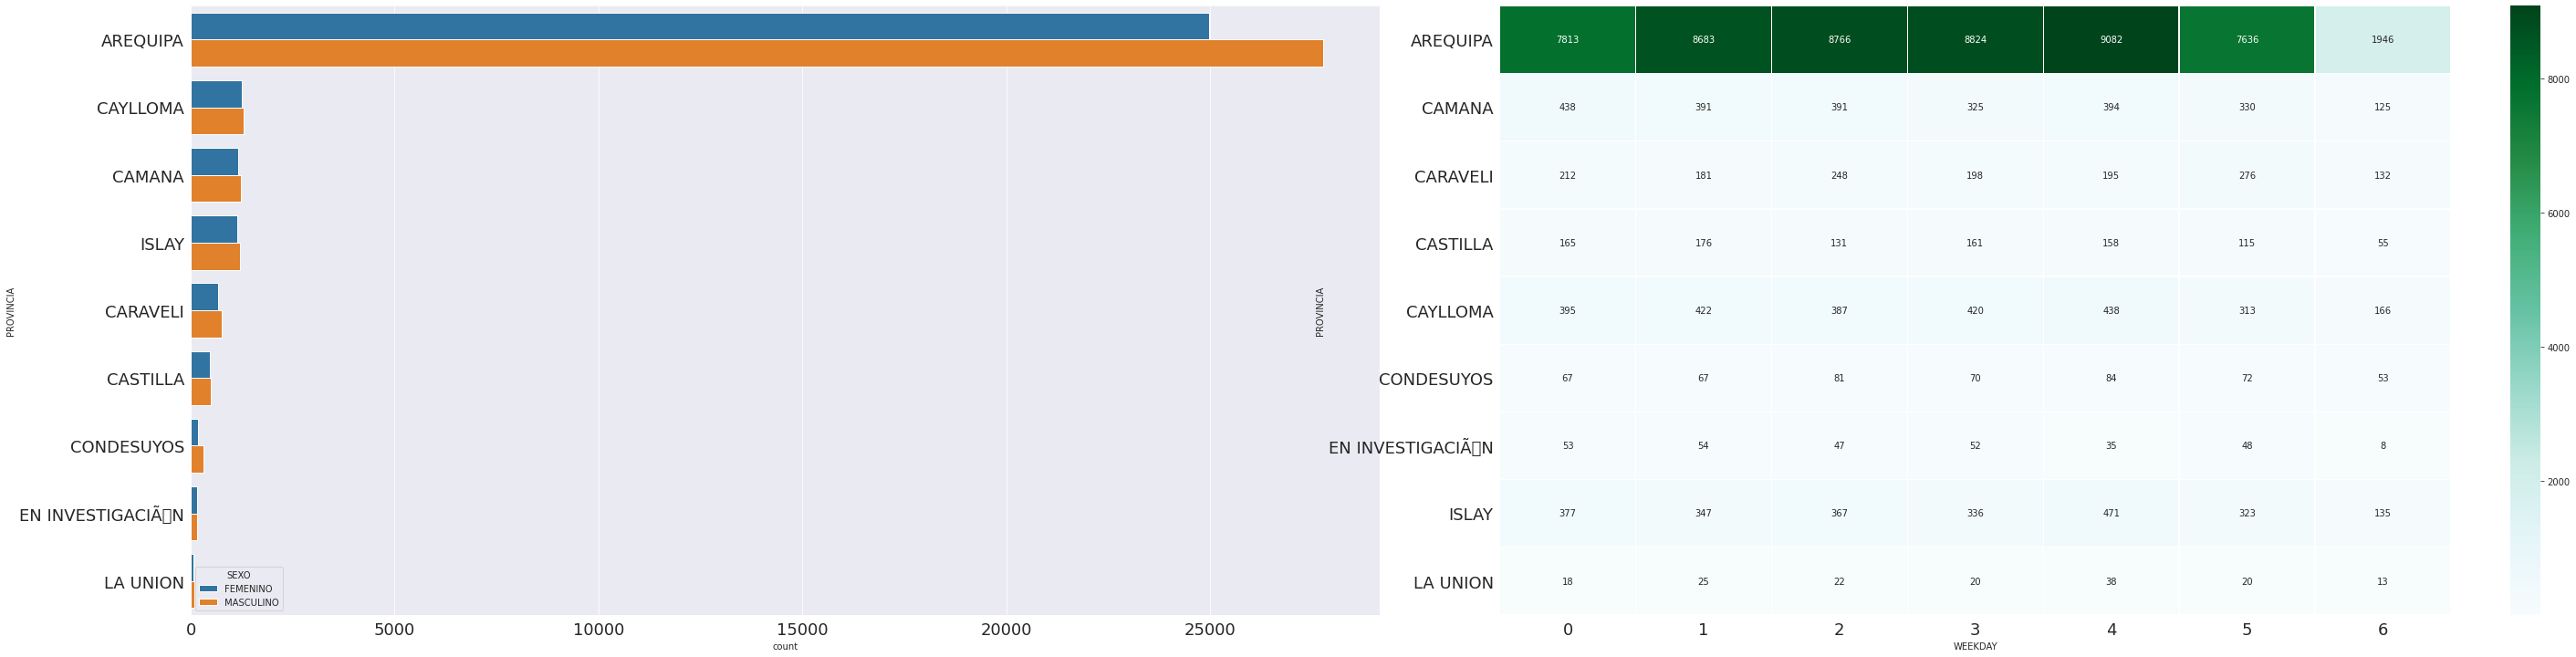

In [ ]:
pd_arequipa_dep_crosstab = pd.crosstab(df_arequipa_dep["PROVINCIA"], df_arequipa_dep["WEEKDAY"])

display(df_arequipa_dep.groupby(['PROVINCIA', 'SEXO'])['UUID'].count().sort_values(ascending=False))

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(40,10))

sns.countplot(data=df_arequipa_dep, y='PROVINCIA', order = df_arequipa_dep['PROVINCIA'].value_counts().index, hue='SEXO', ax = ax1)
sns.heatmap(pd_arequipa_dep_crosstab, cmap="BuGn", linewidths=0.3, annot=True, fmt="d", ax = ax2)
fig.tight_layout()
ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)

plt.show()

In [ ]:
df_arequipa_pro = datos_minsa_cut[(datos_minsa_cut['DEPARTAMENTO'] == 'AREQUIPA') & (datos_minsa_cut['PROVINCIA'] == 'AREQUIPA')].reset_index(drop=True)
df_arequipa_pro['WEEKDAY'] = df_arequipa_pro['FECHA_RESULTADO'].dt.weekday
display(df_arequipa_pro.shape)
display(df_arequipa_pro.tail())

(52750, 10)

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,WEEKDAY
52745,20210322,2FA5F550D3E6EC71D88B21DF2DDB5365,AREQUIPA,AREQUIPA,SOCABAYA,PCR,22,MASCULINO,2021-03-22,0
52746,20210322,8026EF6821335387E4D259DB210444BD,AREQUIPA,AREQUIPA,AREQUIPA,PCR,46,FEMENINO,2021-03-22,0
52747,20210322,3486909E8C4A3A23A92BF13D9DF7A4C0,AREQUIPA,AREQUIPA,PAUCARPATA,PCR,32,MASCULINO,2021-03-22,0
52748,20210322,F3A9192CE6118CDB30FF95BFB60B1895,AREQUIPA,AREQUIPA,SOCABAYA,AG,16,MASCULINO,2021-03-22,0
52749,20210322,68EDF832AAA49F4CA0858CCDA7E2CB58,AREQUIPA,AREQUIPA,VITOR,AG,28,FEMENINO,2021-03-22,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)


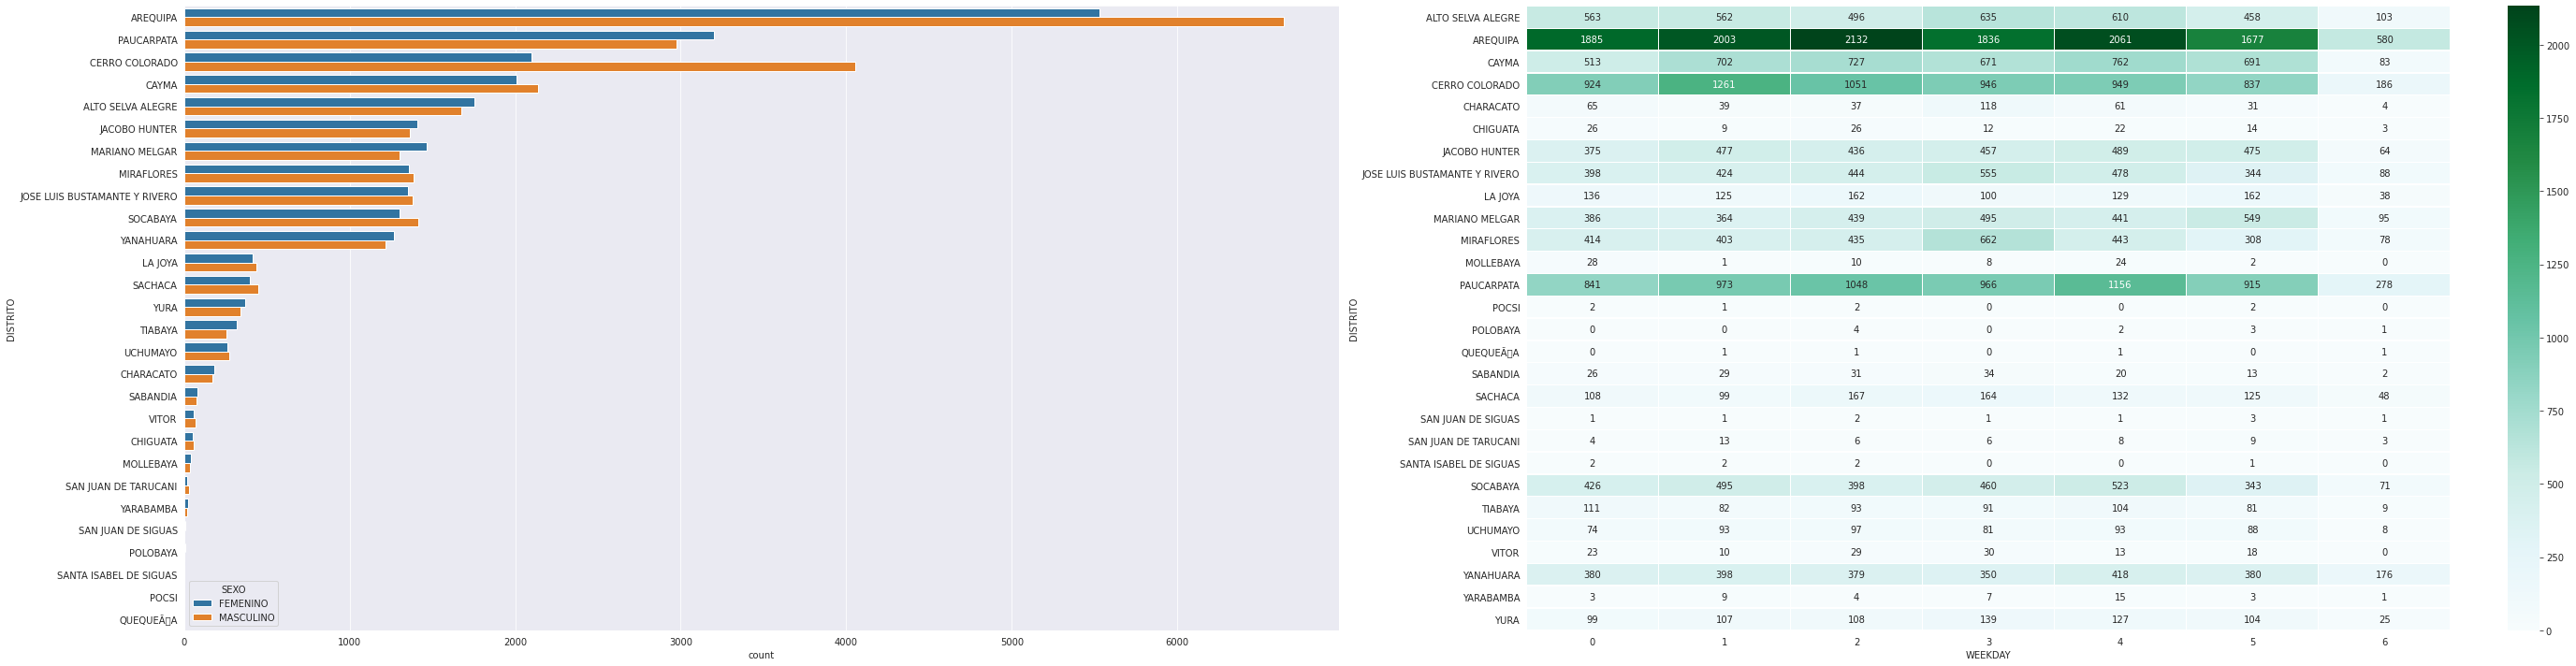

In [ ]:
pd_arequipa_pro_crosstab = pd.crosstab(df_arequipa_pro["DISTRITO"], df_arequipa_pro["WEEKDAY"])

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(40,10))

sns.countplot(data=df_arequipa_pro, y='DISTRITO', order = df_arequipa_pro['DISTRITO'].value_counts().index, hue = 'SEXO', ax = ax1)
sns.heatmap(pd_arequipa_pro_crosstab, cmap="BuGn", linewidths=0.3, annot=True, fmt="d", ax = ax2)
fig.tight_layout()

plt.show()

In [ ]:
df_arequipa_pro

,ï»¿FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,WEEKDAY
0,20210322,2DE3F80CFCCA4199808860AC7B568066,AREQUIPA,AREQUIPA,SACHACA,PR,24,FEMENINO,2020-05-01,4
1,20210322,5C49BCB49A3D63F89DE6C51CB93374D9,AREQUIPA,AREQUIPA,PAUCARPATA,PR,67,FEMENINO,2020-05-01,4
2,20210322,4BC091F2C16D0C500696E1628F91F693,AREQUIPA,AREQUIPA,YANAHUARA,PR,26,MASCULINO,2020-05-01,4
3,20210322,3B0FFE86AFC270F541D5C8046DF69D5F,AREQUIPA,AREQUIPA,PAUCARPATA,PR,25,MASCULINO,2020-05-01,4
4,20210322,05D1ACFA6CD3C6C896CD70EE062FF1D2,AREQUIPA,AREQUIPA,AREQUIPA,PR,61,MASCULINO,2020-05-01,4
...,...,...,...,...,...,...,...,...,...,...
52745,20210322,2FA5F550D3E6EC71D88B21DF2DDB5365,AREQUIPA,AREQUIPA,SOCABAYA,PCR,22,MASCULINO,2021-03-22,0
52746,20210322,8026EF6821335387E4D259DB210444BD,AREQUIPA,AREQUIPA,AREQUIPA,PCR,46,FEMENINO,2021-03-22,0
52747,20210322,3486909E8C4A3A23A92BF13D9DF7A4C0,AREQUIPA,AREQUIPA,PAUCARPATA,PCR,32,MASCULINO,2021-03-22,0
52748,20210322,F3A9192CE6118CDB30FF95BFB60B1895,AREQUIPA,AREQUIPA,SOCABAYA,AG,16,MASCULINO,2021-03-22,0


# Análisis por etapas y edad de las personas

In [ ]:
df_arequipa_pro['ETAPA'] = df_arequipa_pro['EDAD'].apply(lambda x: 
                              'INFANCIA(0-6)' if x <= 6 
                              else 'NIÑEZ(7-12)' if x <= 12 
                              else 'ADOLESCENCIA(13-20)' if x <= 20
                              else 'JUVENTUD(21-25)' if x <= 25
                              #else 'ADULTEZ_JOVEN' if x <= 40
                              #else 'ADULTEZ_INTERMEDIA' if x <= 50
                              #else 'ADULTEZ_TARDIA' if x <= 60 
                              else 'ADULTEZ(26-60)' if x <= 60 
                              else 'ANCIANIDAD(60+)') 

In [ ]:
df_etapas = df_arequipa_pro.groupby(['ETAPA', 'FECHA_RESULTADO']).size().reset_index().pivot(columns='ETAPA', index='FECHA_RESULTADO', values=0)
df_etapas.fillna(0, inplace=True)
df_etapas = df_etapas[['INFANCIA(0-6)', 'NIÑEZ(7-12)', 'ADOLESCENCIA(13-20)', 'JUVENTUD(21-25)', 'ADULTEZ(26-60)', 'ANCIANIDAD(60+)']]
df_etapas

ETAPA,INFANCIA(0-6),NIÑEZ(7-12),ADOLESCENCIA(13-20),JUVENTUD(21-25),ADULTEZ(26-60),ANCIANIDAD(60+)
FECHA_RESULTADO,,,,,,
2020-05-01,0.0,1.0,0.0,2.0,31.0,4.0
2020-05-02,0.0,0.0,0.0,1.0,23.0,5.0
2020-05-03,0.0,0.0,0.0,0.0,4.0,3.0
2020-05-04,2.0,1.0,1.0,10.0,38.0,4.0
2020-05-05,0.0,0.0,0.0,2.0,44.0,7.0
...,...,...,...,...,...,...
2021-03-18,0.0,2.0,8.0,10.0,92.0,20.0
2021-03-19,1.0,1.0,0.0,8.0,72.0,12.0
2021-03-20,0.0,2.0,7.0,4.0,55.0,15.0


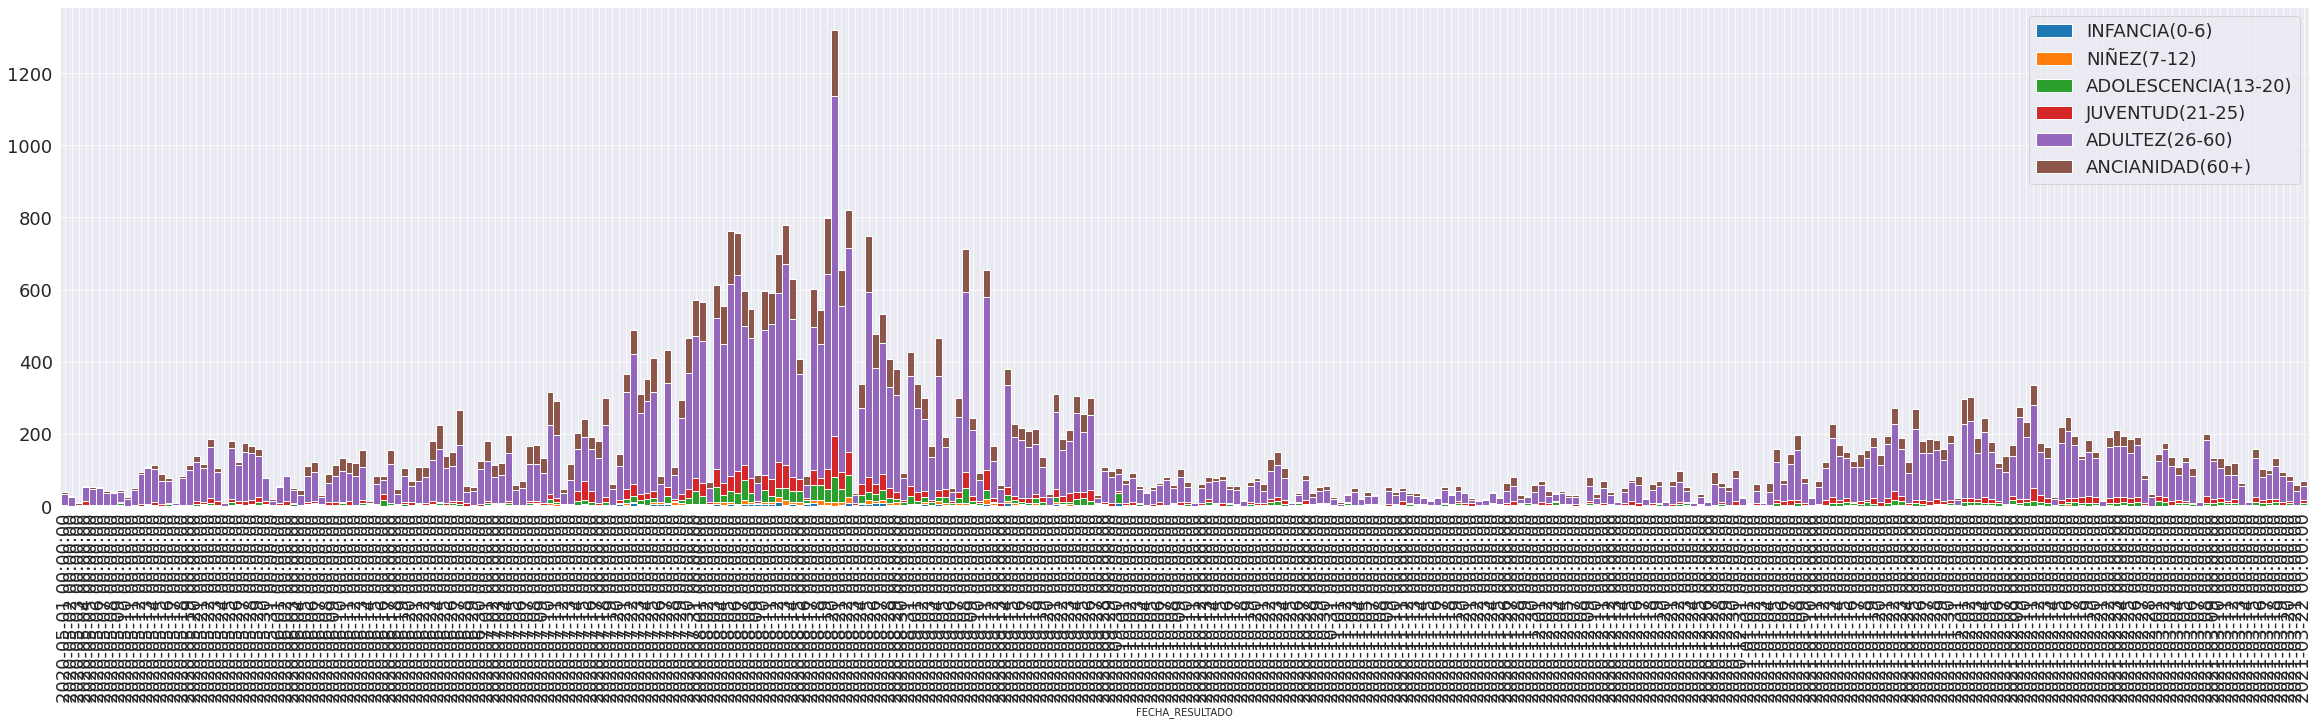

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(32,9))

df_etapas.plot(kind='bar', stacked=True, width=1, ax=ax1)
ax1.legend(fontsize=18)
fig.tight_layout()
ax1.tick_params(labelsize=18)
#ax1.set_xlim([pd.to_datetime('2020-10-01'),None])

plt.savefig('MINSA_EdadFranjas.pdf')
plt.show()

In [ ]:
df_plot = df_etapas.copy()
df_plot['SUM'] = df_plot.sum(axis=1)

df_plot['INFANCIA(0-6)'] = df_plot['INFANCIA(0-6)'] / df_plot['SUM']
df_plot['NIÑEZ(7-12)'] = df_plot['NIÑEZ(7-12)'] / df_plot['SUM']
df_plot['ADOLESCENCIA(13-20)'] = df_plot['ADOLESCENCIA(13-20)'] / df_plot['SUM']
#df_plot['ADULTEZ_INTERMEDIA'] = df_plot['ADULTEZ_INTERMEDIA'] / df_plot['SUM']
#df_plot['ADULTEZ_JOVEN'] = df_plot['ADULTEZ_JOVEN'] / df_plot['SUM']
#df_plot['ADULTEZ_TARDIA'] = df_plot['ADULTEZ_TARDIA'] / df_plot['SUM']
df_plot['JUVENTUD(21-25)'] = df_plot['JUVENTUD(21-25)'] / df_plot['SUM']
df_plot['ADULTEZ(26-60)'] = df_plot['ADULTEZ(26-60)'] / df_plot['SUM']
df_plot['ANCIANIDAD(60+)'] = df_plot['ANCIANIDAD(60+)'] / df_plot['SUM']
del df_plot['SUM']
df_plot

ETAPA,INFANCIA(0-6),NIÑEZ(7-12),ADOLESCENCIA(13-20),JUVENTUD(21-25),ADULTEZ(26-60),ANCIANIDAD(60+)
FECHA_RESULTADO,,,,,,
2020-05-01,0.000000,0.026316,0.000000,0.052632,0.815789,0.105263
2020-05-02,0.000000,0.000000,0.000000,0.034483,0.793103,0.172414
2020-05-03,0.000000,0.000000,0.000000,0.000000,0.571429,0.428571
2020-05-04,0.035714,0.017857,0.017857,0.178571,0.678571,0.071429
2020-05-05,0.000000,0.000000,0.000000,0.037736,0.830189,0.132075
...,...,...,...,...,...,...
2021-03-18,0.000000,0.015152,0.060606,0.075758,0.696970,0.151515
2021-03-19,0.010638,0.010638,0.000000,0.085106,0.765957,0.127660
2021-03-20,0.000000,0.024096,0.084337,0.048193,0.662651,0.180723


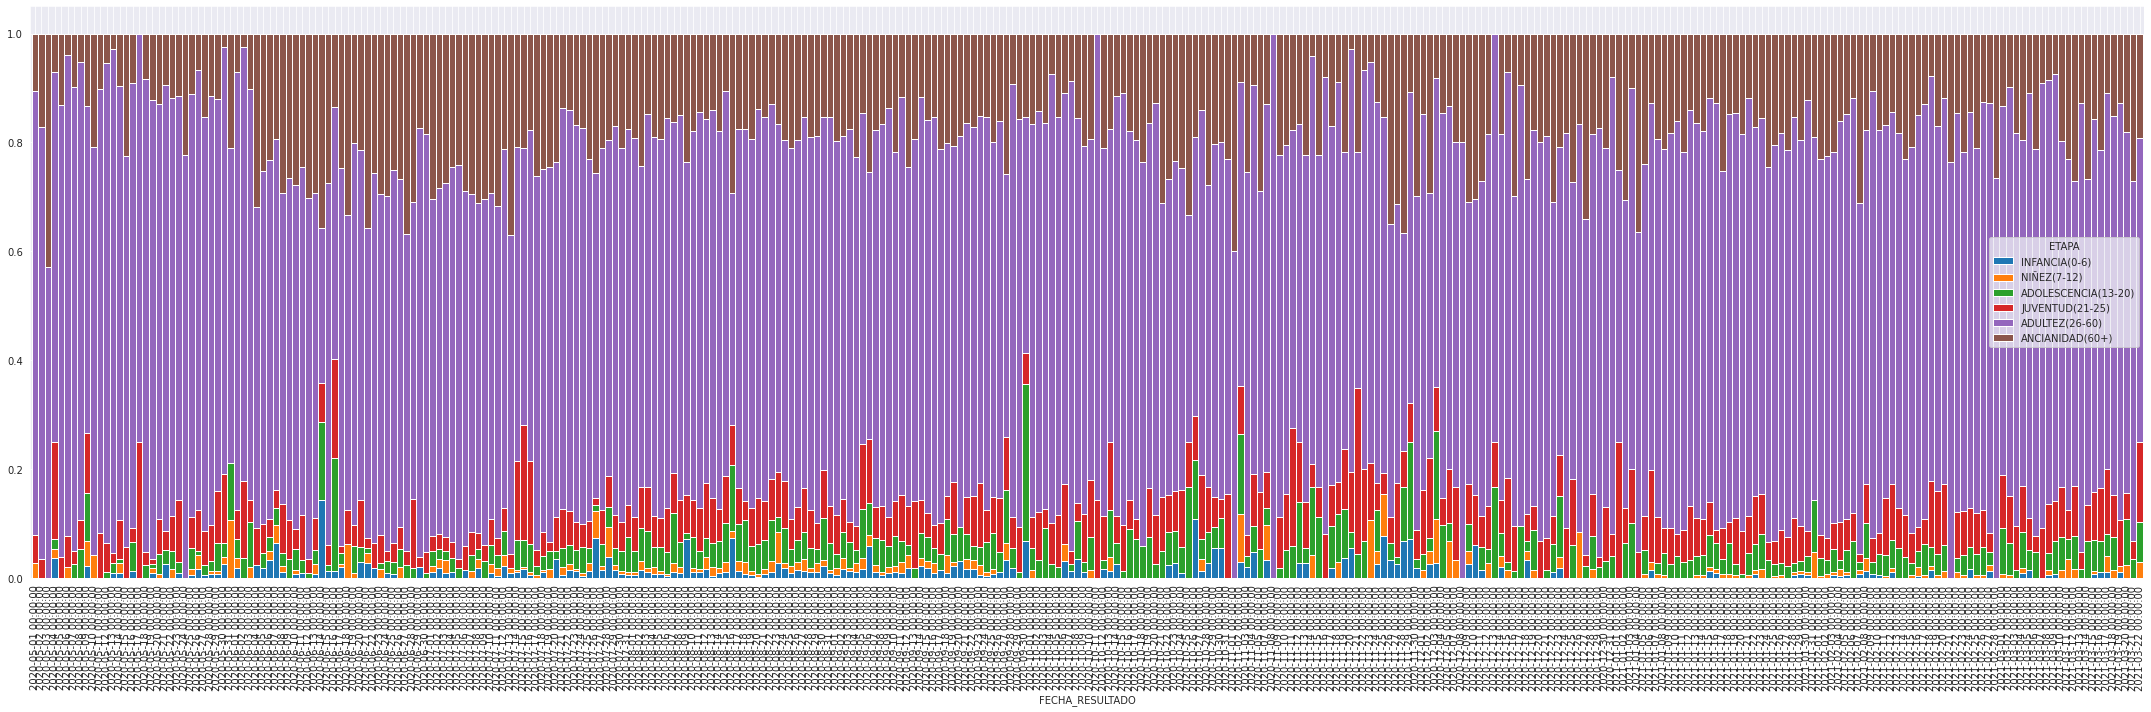

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(30,10))

df_plot.plot(kind='bar', stacked=True, width=1, ax=ax1)
fig.tight_layout()

plt.show()

In [ ]:
df_edad = df_arequipa_pro.EDAD
#df_edad.replace([0], np.nan, inplace=True)
display(df_edad.value_counts().sort_index().shape)
df_edad.describe()

(106,)

count    52750.000000
mean        44.312645
std         17.134661
min          0.000000
25%         32.000000
50%         43.000000
75%         56.000000
max        119.000000
Name: EDAD, dtype: float64

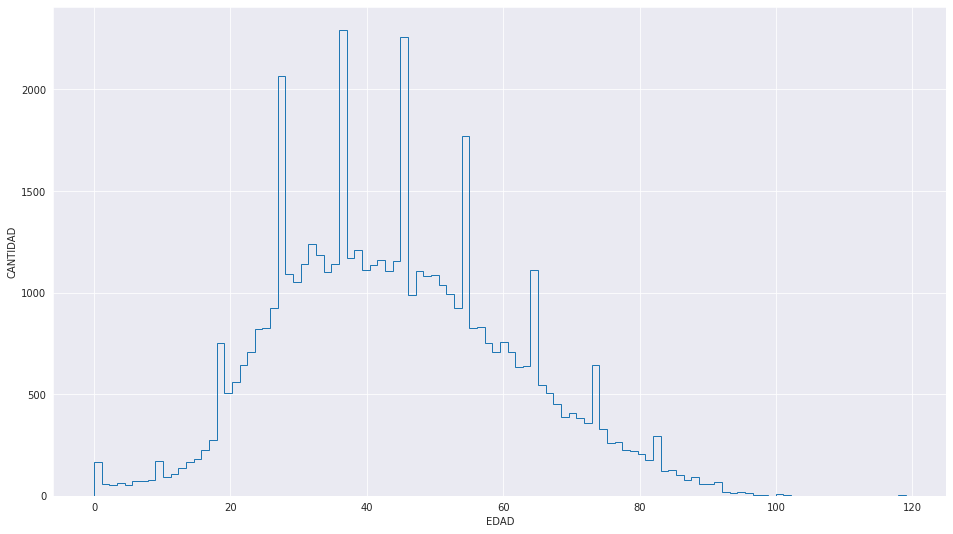

In [ ]:
plt.figure(figsize=(16,9))
plt.hist(df_edad.dropna(), bins=106, histtype='step')
plt.xlabel('EDAD')
plt.ylabel('CANTIDAD')
plt.show()

In [ ]:
is_masculine = df_arequipa_pro.SEXO == 'MASCULINO'
is_PCR = df_arequipa_pro.METODODX == 'PCR'
edad_sex_masculine = df_edad[is_masculine]
edad_sex_femenine = df_edad[~is_masculine]
print('Promedio de Edad Hombres: ', edad_sex_masculine.mean())
print('Promedio de Edad Mujeres: ',edad_sex_femenine.mean())

edad_sex_masculine_pcr = df_edad[is_masculine & is_PCR]
edad_sex_femenine_pcr = df_edad[~is_masculine & is_PCR]
print('Promedio de Edad Hombres - PCR: ',edad_sex_masculine_pcr.mean())
print('Promedio de Edad Mujeres - PCR: ',edad_sex_femenine_pcr.mean())

Promedio de Edad Hombres:  44.619800482587245
Promedio de Edad Mujeres:  43.97126045711084
Promedio de Edad Hombres - PCR:  46.291809523809526
Promedio de Edad Mujeres - PCR:  47.35134604047946
